In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d kpgeek/kitti-roadlane-detection-dataset-224-x-224/
!unzip -qq kitti-roadlane-detection-dataset-224-x-224.zip
!rm kitti-roadlane-detection-dataset-224-x-224.zip

kaggle.json
 96% 240M/250M [00:09<00:00, 29.9MB/s]
100% 250M/250M [00:10<00:00, 25.9MB/s]


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
base_path_images = '/content/data_road_224/training/image_2'
base_path_masks = '/content/data_road_224/training/gt_image_2'

Images =[]
Masks = []

Image_file_name = []
Masks_file_name = []

In [ ]:
for files in os.listdir(base_path_images):
  Image_file_name.append(files)

for files in os.listdir(base_path_masks):
  Masks_file_name.append(files)

Image_file_name.sort()
Masks_file_name.sort()

In [ ]:
print(Image_file_name)
print(Masks_file_name)

['image_224 (1).png', 'image_224 (10).png', 'image_224 (100).png', 'image_224 (101).png', 'image_224 (102).png', 'image_224 (103).png', 'image_224 (104).png', 'image_224 (105).png', 'image_224 (106).png', 'image_224 (107).png', 'image_224 (108).png', 'image_224 (109).png', 'image_224 (11).png', 'image_224 (110).png', 'image_224 (111).png', 'image_224 (112).png', 'image_224 (113).png', 'image_224 (114).png', 'image_224 (115).png', 'image_224 (116).png', 'image_224 (117).png', 'image_224 (118).png', 'image_224 (119).png', 'image_224 (12).png', 'image_224 (120).png', 'image_224 (121).png', 'image_224 (122).png', 'image_224 (123).png', 'image_224 (124).png', 'image_224 (125).png', 'image_224 (126).png', 'image_224 (127).png', 'image_224 (128).png', 'image_224 (129).png', 'image_224 (13).png', 'image_224 (130).png', 'image_224 (131).png', 'image_224 (132).png', 'image_224 (133).png', 'image_224 (134).png', 'image_224 (135).png', 'image_224 (136).png', 'image_224 (137).png', 'image_224 (138)

In [ ]:
for files in Image_file_name:
  image_name = os.path.join(base_path_images, files)
  image = cv2.imread(image_name)[:, :, ::-1]
  print(files)
  Images.append(image)

Images = np.array(Images)
print(Images.shape)
print(len(Images))

In [ ]:
for files in Masks_file_name:
  mask_name = os.path.join(base_path_masks, files)
  if (files[len(files) - 4:] == '.png'):
    print(files)
    mask = cv2.imread(mask_name)[:, :, ::-1]
    Masks.append(mask)

Masks = np.array(Masks)
print(Masks.shape)
print(len(Masks))

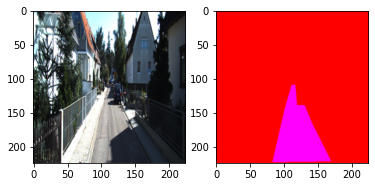

In [ ]:
plt.subplot(121)
plt.imshow(Images[150])
plt.subplot(122)
plt.imshow(Masks[150])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

Image_datagen = ImageDataGenerator(rescale = 1/255)
Mask_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
Image_set = Image_datagen.flow(Images, batch_size=8, shuffle=False, seed=24)
Mask_set = Mask_datagen.flow(Masks, batch_size=8, shuffle = False, seed=24)

In [ ]:
def image_mask_generator(Image_set, Mask_set):
  train_gen = zip(Image_set, Mask_set)
  for t, m in train_gen:
    yield(t, m)

In [ ]:
my_train_gen = image_mask_generator(Image_set, Mask_set)

In [ ]:
from UNet_Model import build_unet
from tensorflow.keras.optimizers import Adam

In [ ]:
input_shape = (Images.shape[1], Images.shape[2], Images.shape[3])

steps_per_epoch = 3*(289)//8

model = build_unet((input_shape))
model.compile(optimizer = Adam(lr = 1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(my_train_gen, steps_per_epoch=steps_per_epoch, epochs= 30)

Epoch 1/30
108/108 [==============================] - 112s 868ms/step - loss: 0.5380 - accuracy: 0.9111
Epoch 2/30
108/108 [==============================] - 91s 842ms/step - loss: 0.3418 - accuracy: 0.9561
Epoch 3/30
108/108 [==============================] - 91s 842ms/step - loss: 0.3205 - accuracy: 0.9787
Epoch 4/30
108/108 [==============================] - 91s 842ms/step - loss: 0.3127 - accuracy: 0.9752
Epoch 5/30
108/108 [==============================] - 91s 842ms/step - loss: 0.3038 - accuracy: 0.9778
Epoch 6/30
108/108 [==============================] - 91s 841ms/step - loss: 0.2975 - accuracy: 0.9906
Epoch 7/30
108/108 [==============================] - 91s 841ms/step - loss: 0.2888 - accuracy: 0.9912
Epoch 8/30
108/108 [==============================] - 91s 842ms/step - loss: 0.2858 - accuracy: 0.9901
Epoch 9/30
108/108 [==============================] - 91s 842ms/step - loss: 0.2833 - accuracy: 0.9885
Epoch 10/30
108/108 [==============================] - 91s 841ms/step - 

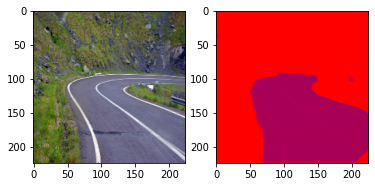

In [ ]:
Listy = []
img_1 = (cv2.imread(r'/content/curved_a.jpg')[:, :, ::-1])/255
img_1 = cv2.resize(img_1, (224, 224))
Listy.append(img_1)

Listy = np.array(Listy)

img = model.predict(Listy)
img = np.squeeze(img)

plt.subplot(121)
plt.imshow(img_1)
plt.subplot(122)
plt.imshow(img)
plt.show()

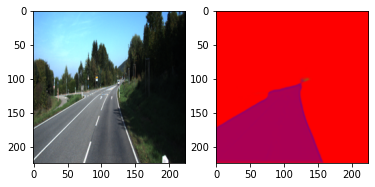

In [ ]:
Listy = []
img_1 = (cv2.imread(r'/content/data_road_224/training/image_2/image_224 (141).png')[:, :, ::-1])/255
img_1 = cv2.resize(img_1, (224, 224))
Listy.append(img_1)

Listy = np.array(Listy)

img = model.predict(Listy)
img = np.squeeze(img)

plt.subplot(121)
plt.imshow(img_1)
plt.subplot(122)
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


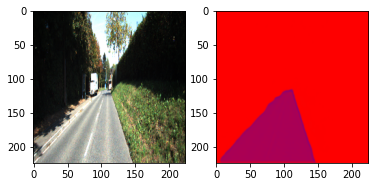

In [ ]:
Listy = []
img_1 = (cv2.imread(r'/content/data_road_224/testing/image_2/um_000021.png')[:, :, ::-1])/255
img_1 = cv2.resize(img_1, (224, 224))
Listy.append(img_1)

Listy = np.array(Listy)

img = model.predict(Listy)
img = np.squeeze(img)

plt.subplot(121)
plt.imshow(img_1)
plt.subplot(122)
plt.imshow(img)
plt.show()

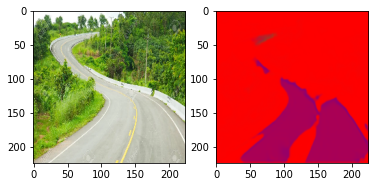

In [ ]:
Listy = []
img_1 = (cv2.imread(r'/content/curved_road.webp')[:, :, ::-1])/255
img_1 = cv2.resize(img_1, (224, 224))
Listy.append(img_1)

Listy = np.array(Listy)

img = model.predict(Listy)
img = np.squeeze(img)

plt.subplot(121)
plt.imshow(img_1)
plt.subplot(122)
plt.imshow(img)
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/Road_Segmentation.h5')